## **Tugas Akhir - Logika Fuzzy**

### **Kelompok 4:**

**1. Ichlasuning Diah Amaliah (185150207111004)**<br/>
**2. Nur Wahyu Melliano Hariyanto (195150201111044)**<br/>
**3. Rayhan Adhika (195150201111048)**<br/>
**4. Anthony Aaron (195150207111045)**

# **Import Dataset**

In [1]:
! pip install -q kaggle

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [3]:
! chmod 600 /content/kaggle.json

In [4]:
! kaggle datasets download -d podsyp/time-series-starter-dataset

  0% 0.00/1.86k [00:00<?, ?B/s]
100% 1.86k/1.86k [00:00<00:00, 1.62MB/s]


In [5]:
import zipfile
zip_file = zipfile.ZipFile('/content/time-series-starter-dataset.zip', 'r')
zip_file.extractall('/tmp/')

In [6]:
import pandas as pd

value = pd.read_csv("/tmp/Month_Value_1.csv")
value.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


# **Analysis Dataset**

In [7]:
value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [8]:
dataset = value.head(64)

In [9]:
dataset.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


# **Visualization**

In [10]:
month = []

for i in range(64):
  month.append(i+1)

print(month)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [11]:
import matplotlib.pyplot as plt

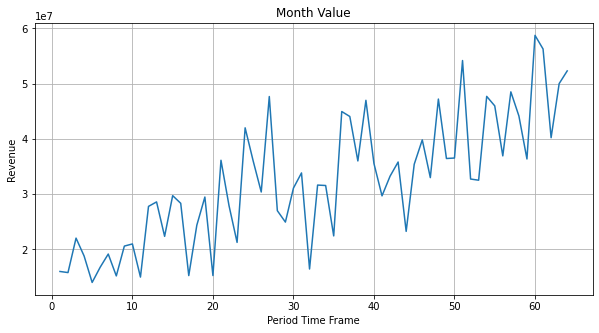

In [12]:
y = dataset['Revenue']
x = month
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y)
plt.xlabel('Period Time Frame')
plt.ylabel('Revenue')
plt.title('Month Value')
plt.grid(True)
plt.show()

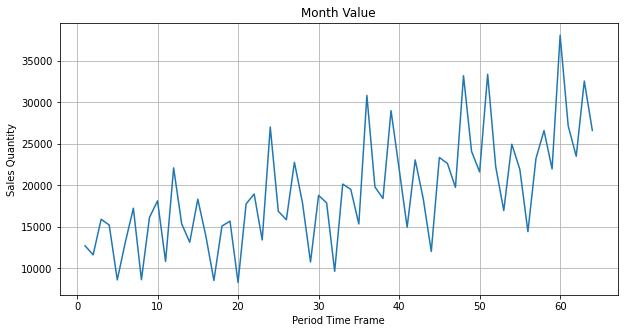

In [13]:
y = dataset['Sales_quantity']
x = month
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y)
plt.xlabel('Period Time Frame')
plt.ylabel('Sales Quantity')
plt.title('Month Value')
plt.grid(True)
plt.show()

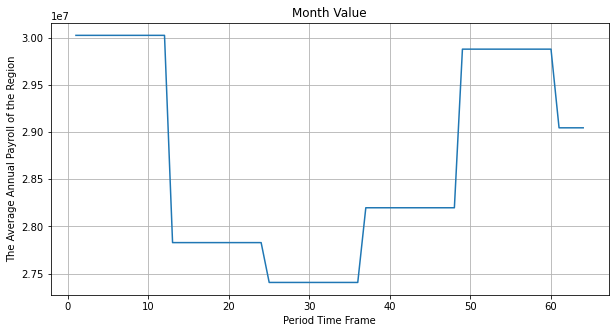

In [14]:
y = dataset['The_average_annual_payroll_of_the_region']
x = month
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y)
plt.xlabel('Period Time Frame')
plt.ylabel('The Average Annual Payroll of the Region')
plt.title('Month Value')
plt.grid(True)
plt.show()

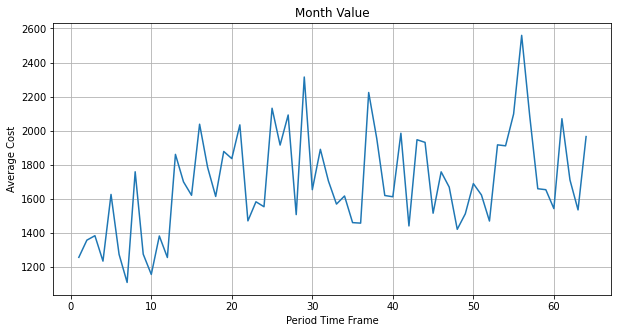

In [15]:
y = dataset['Average_cost']
x = month
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y)
plt.xlabel('Period Time Frame')
plt.ylabel('Average Cost')
plt.title('Month Value')
plt.grid(True)
plt.show()

# **Fuzzy Time Series**

In [16]:
data = dataset.copy()
del(data['The_average_annual_payroll_of_the_region'])
del(data['Average_cost'])
del(data['Sales_quantity'])
data.head()

,Period,Revenue
0,01.01.2015,1.601007e+07
1,01.02.2015,1.580759e+07
2,01.03.2015,2.204715e+07
3,01.04.2015,1.881458e+07
4,01.05.2015,1.402148e+07


In [17]:
import numpy as np
np.warnings.filterwarnings('ignore')

In [18]:
for i in range(len(data['Period'])):
  data['Period'][i] = month[i]

data.head()

,Period,Revenue
0,1,1.601007e+07
1,2,1.580759e+07
2,3,2.204715e+07
3,4,1.881458e+07
4,5,1.402148e+07


### **Mencari data max dan min**

In [19]:
max_data = data['Revenue'].max() + 200000 #acak positif
min_data = data['Revenue'].min() - 200000 #acak positif

print('Nilai Max :',max_data)
print('Nilai Min :',min_data)

Nilai Max : 58956473.6608
Nilai Min : 13821479.611678


### **Mencari nilai setengah dari rata-rata nilai absolut**

In [21]:
abs_result = []

for i in range(len(data['Revenue'])-1):
  absolut = abs(data['Revenue'][i+1] - data['Revenue'][i])
  abs_result.append(absolut)

setengah_rata_rata = (np.mean(abs_result))/2
print('Setengah Rata-rata : ', setengah_rata_rata)

Setengah Rata-rata :  4231719.606525381


### **Menentukan jumlah sub himpunan**

In [22]:
def pembulatan(x):
  if x >= 1000.1 and x <= 10000:
    f = (max_data-min_data) / 1000
    f = round(f)
    return f
  elif x >= 10000.1 and x <= 100000:
    f = (max_data-min_data) / 10000
    f = round(f)
    return f
  elif x >= 100000.1 and x <= 1000000:
    f = (max_data-min_data) / 100000
    f = round(f)
    return f
  elif x >= 1000000.1 and x <= 10000000:
    f = (max_data-min_data) / 1000000
    f = round(f)
    return f

sub_himpunan = pembulatan(setengah_rata_rata)
print('Jumlah Sub Himpunan : ', sub_himpunan)

Jumlah Sub Himpunan :  45


### **Menentukan nilai interval untuk menentukan batas (𝑢𝑖)**

In [23]:
import math

In [30]:
range_sub = (max_data - min_data) / sub_himpunan
interval = math.ceil(range_sub)
print('Interval: ', interval)

Interval:  1003000


### **Menetapkan nilai batas tiap (𝑢𝑖)**

In [31]:
u = [range(math.floor(min_data + i * interval),math.floor(min_data + (i + 1) * interval)) for i in range(sub_himpunan)]

print('Interval : (Batas Bawah, Batas Atas)')
for i in range(sub_himpunan):
  print(f'u{str([i + 1])}:', u[i])

Interval : (Batas Bawah, Batas Atas)
u[1]: range(13821479, 14824479)
u[2]: range(14824479, 15827479)
u[3]: range(15827479, 16830479)
u[4]: range(16830479, 17833479)
u[5]: range(17833479, 18836479)
u[6]: range(18836479, 19839479)
u[7]: range(19839479, 20842479)
u[8]: range(20842479, 21845479)
u[9]: range(21845479, 22848479)
u[10]: range(22848479, 23851479)
u[11]: range(23851479, 24854479)
u[12]: range(24854479, 25857479)
u[13]: range(25857479, 26860479)
u[14]: range(26860479, 27863479)
u[15]: range(27863479, 28866479)
u[16]: range(28866479, 29869479)
u[17]: range(29869479, 30872479)
u[18]: range(30872479, 31875479)
u[19]: range(31875479, 32878479)
u[20]: range(32878479, 33881479)
u[21]: range(33881479, 34884479)
u[22]: range(34884479, 35887479)
u[23]: range(35887479, 36890479)
u[24]: range(36890479, 37893479)
u[25]: range(37893479, 38896479)
u[26]: range(38896479, 39899479)
u[27]: range(39899479, 40902479)
u[28]: range(40902479, 41905479)
u[29]: range(41905479, 42908479)
u[30]: range(42

### **Menentukan nilai midpoint**

In [32]:
midpoint = [(math.floor(min_data + i * interval) + math.floor(min_data + (i + 1) * interval))/2 for i in range(sub_himpunan)]

print('Midpoint: ')
for i in range(sub_himpunan):
  print(f'm{str([i+1])}:',midpoint[i])

Midpoint: 
m[1]: 14322979.0
m[2]: 15325979.0
m[3]: 16328979.0
m[4]: 17331979.0
m[5]: 18334979.0
m[6]: 19337979.0
m[7]: 20340979.0
m[8]: 21343979.0
m[9]: 22346979.0
m[10]: 23349979.0
m[11]: 24352979.0
m[12]: 25355979.0
m[13]: 26358979.0
m[14]: 27361979.0
m[15]: 28364979.0
m[16]: 29367979.0
m[17]: 30370979.0
m[18]: 31373979.0
m[19]: 32376979.0
m[20]: 33379979.0
m[21]: 34382979.0
m[22]: 35385979.0
m[23]: 36388979.0
m[24]: 37391979.0
m[25]: 38394979.0
m[26]: 39397979.0
m[27]: 40400979.0
m[28]: 41403979.0
m[29]: 42406979.0
m[30]: 43409979.0
m[31]: 44412979.0
m[32]: 45415979.0
m[33]: 46418979.0
m[34]: 47421979.0
m[35]: 48424979.0
m[36]: 49427979.0
m[37]: 50430979.0
m[38]: 51433979.0
m[39]: 52436979.0
m[40]: 53439979.0
m[41]: 54442979.0
m[42]: 55445979.0
m[43]: 56448979.0
m[44]: 57451979.0
m[45]: 58454979.0


### **Menentukan interval fuzzy set**

In [33]:
range_fuzzy_set = (max_data - min_data)/(sub_himpunan - 1)
print('Interval Fuzzy Set : ', range_fuzzy_set)

Interval Fuzzy Set :  1025795.3192982274


In [34]:
fuzzy_set = [(math.floor(min_data + i * range_fuzzy_set) + math.floor(min_data + (i + 1) * range_fuzzy_set))/2 for i in range(sub_himpunan)]

print('Fuzzy Set: ')
for i in range(sub_himpunan):
  print(f'A{str([i+1])}:',fuzzy_set[i])

Fuzzy Set: 
A[1]: 14334376.5
A[2]: 15360172.0
A[3]: 16385967.5
A[4]: 17411762.5
A[5]: 18437558.0
A[6]: 19463353.5
A[7]: 20489148.5
A[8]: 21514944.0
A[9]: 22540739.5
A[10]: 23566534.5
A[11]: 24592330.0
A[12]: 25618125.5
A[13]: 26643920.5
A[14]: 27669716.0
A[15]: 28695511.5
A[16]: 29721306.5
A[17]: 30747102.0
A[18]: 31772897.5
A[19]: 32798692.5
A[20]: 33824487.5
A[21]: 34850283.0
A[22]: 35876078.5
A[23]: 36901873.5
A[24]: 37927669.0
A[25]: 38953464.5
A[26]: 39979259.5
A[27]: 41005055.0
A[28]: 42030850.5
A[29]: 43056645.5
A[30]: 44082441.0
A[31]: 45108236.5
A[32]: 46134031.5
A[33]: 47159827.0
A[34]: 48185622.5
A[35]: 49211417.5
A[36]: 50237213.0
A[37]: 51263008.5
A[38]: 52288803.5
A[39]: 53314599.0
A[40]: 54340394.5
A[41]: 55366189.5
A[42]: 56391985.0
A[43]: 57417780.5
A[44]: 58443575.5
A[45]: 59469370.5


### **Mencari derajat keanggotaan**

In [36]:
derajat_keanggotaan = []

for i in range(len(data['Revenue'])):
  kolom = []
  drjt = 1
    
  for j in range(sub_himpunan):
    if j == 0:
      if data['Revenue'][i] == fuzzy_set[j]:
        drjt = 1
      elif data['Revenue'][i] > fuzzy_set[j] and data['Revenue'][i] < fuzzy_set[j + 1]:
        drjt = (fuzzy_set[j + 1] - data['Revenue'][i])/(fuzzy_set[j + 1] - fuzzy_set[j])
      else:
        drjt = 0
    elif j == sub_himpunan-1:
      if data['Revenue'][i] == fuzzy_set[j]:
        drjt = 1
      elif data['Revenue'][i] > fuzzy_set[j-1] and data['Revenue'][i] < fuzzy_set[j]:
        drjt = (data['Revenue'][i] - fuzzy_set[j-1])/(fuzzy_set[j] - fuzzy_set[j-1])
      else:
        drjt = 0
    else:
      if data['Revenue'][i] == fuzzy_set[j]:
        drjt = 1
      elif data['Revenue'][i] > fuzzy_set[j-1] and data['Revenue'][i] < fuzzy_set[j]:
        drjt = (data['Revenue'][i] - fuzzy_set[j-1])/(fuzzy_set[j] - fuzzy_set[j-1])
      elif data['Revenue'][i] > fuzzy_set[j] and data['Revenue'][i] < fuzzy_set[j + 1]:
        drjt = (fuzzy_set[j + 1] - data['Revenue'][i])/(fuzzy_set[j + 1] - fuzzy_set[j])
      else:
        drjt = 0

    kolom.append(drjt)

  derajat_keanggotaan.append(kolom)

In [37]:
for i in range(len(data['Period'])):
  print("Bulan Ke -", i+1, ":", derajat_keanggotaan[i])

Bulan Ke - 1 : [0, 0.36644280512051375, 0.6335571948794863, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bulan Ke - 2 : [0, 0.5638356282436433, 0.4361643717563567, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bulan Ke - 3 : [0, 0, 0, 0, 0, 0, 0, 0.4811811675485023, 0.5188188324514977, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bulan Ke - 4 : [0, 0, 0, 0, 0.6324556948436604, 0.3675443051563397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bulan Ke - 5 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bulan Ke - 6 : [0, 0, 0.6120462449982689, 0.38795375500173107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### **Melakukan fuzzifikasi**

In [38]:
def Fuzzifikasi(data):
  list_fuzzifikasi = []

  for i in range(len(data)):
    max_tes = max(data[i])

    for j in range(len(data[0])):
      if max_tes == data[i][j] and max_tes != 0:
        list_fuzzifikasi.append('A'+str(j+1))
      elif max_tes == data[i][j] and max_tes == 0:
        list_fuzzifikasi.append('A'+str(j+1))
        break
  
  return list_fuzzifikasi

pd.set_option('max_row', None)
fuzzifikasi = pd.DataFrame(Fuzzifikasi(derajat_keanggotaan), columns=['Fuzzifikasi'])
fuzzifikasi_result = pd.concat([data['Revenue'],fuzzifikasi], axis=1)
print('Fuzzifikasi :')
display(fuzzifikasi_result)

Fuzzifikasi :


,Revenue,Fuzzifikasi
0,1.601007e+07,A3
1,1.580759e+07,A2
2,2.204715e+07,A9
3,1.881458e+07,A5
4,1.402148e+07,A1
5,1.678393e+07,A3
6,1.916189e+07,A6
7,1.520498e+07,A2
8,2.060394e+07,A7
9,2.099287e+07,A7


### **Menentukan FLR dari hasil fuzzifikasi**

In [39]:
list_current = []

for i in range(len(fuzzifikasi_result['Fuzzifikasi'])-1):
  list_current.append(fuzzifikasi_result['Fuzzifikasi'][i])

list_next = []

for i in range(len(fuzzifikasi_result['Fuzzifikasi'])-1):
  list_next.append(fuzzifikasi_result['Fuzzifikasi'][i+1])

print('FLR: ')
for i in range(len(list_current)):
  print(f'Bulan Ke {str([i+1])}:',list_current[i], " -> ", list_next[i])

FLR: 
Bulan Ke [1]: A3  ->  A2
Bulan Ke [2]: A2  ->  A9
Bulan Ke [3]: A9  ->  A5
Bulan Ke [4]: A5  ->  A1
Bulan Ke [5]: A1  ->  A3
Bulan Ke [6]: A3  ->  A6
Bulan Ke [7]: A6  ->  A2
Bulan Ke [8]: A2  ->  A7
Bulan Ke [9]: A7  ->  A7
Bulan Ke [10]: A7  ->  A2
Bulan Ke [11]: A2  ->  A14
Bulan Ke [12]: A14  ->  A15
Bulan Ke [13]: A15  ->  A9
Bulan Ke [14]: A9  ->  A16
Bulan Ke [15]: A16  ->  A15
Bulan Ke [16]: A15  ->  A2
Bulan Ke [17]: A2  ->  A11
Bulan Ke [18]: A11  ->  A16
Bulan Ke [19]: A16  ->  A2
Bulan Ke [20]: A2  ->  A22
Bulan Ke [21]: A22  ->  A14
Bulan Ke [22]: A14  ->  A8
Bulan Ke [23]: A8  ->  A28
Bulan Ke [24]: A28  ->  A22
Bulan Ke [25]: A22  ->  A17
Bulan Ke [26]: A17  ->  A34
Bulan Ke [27]: A34  ->  A13
Bulan Ke [28]: A13  ->  A11
Bulan Ke [29]: A11  ->  A17
Bulan Ke [30]: A17  ->  A20
Bulan Ke [31]: A20  ->  A3
Bulan Ke [32]: A3  ->  A18
Bulan Ke [33]: A18  ->  A18
Bulan Ke [34]: A18  ->  A9
Bulan Ke [35]: A9  ->  A31
Bulan Ke [36]: A31  ->  A30
Bulan Ke [37]: A30  ->  A22


### **Menentukan FLRG**

In [40]:
FLRG_result = pd.DataFrame([])
cek_state = []

for i in range(sub_himpunan):
  test = 'A' + str(i+1)
  list_FLR = ''
  list_FLR_state = []

  for j in range(len(list_current)):
    if list_current[j] == test:
      list_FLR += ' ' + list_next[j]+','
      list_FLR_state.append(list_next[j])

  cek_state.append(list_FLR_state)
  list_FLR_series = pd.Series(list_FLR)
  test_df = pd.Series(test)
  FLRG = pd.concat([test_df,list_FLR_series],axis=1)
  FLRG_result = pd.concat([FLRG_result,FLRG], ignore_index=True)

FLRG_result.columns = ['Current State','Next State']
print('FLRG :')
pd.set_option('max_colwidth',None)
display(FLRG_result)

FLRG :


,Current State,Next State
0,A1,"A3,"
1,A2,"A9, A7, A14, A11, A22,"
2,A3,"A2, A6, A18,"
3,A4,
4,A5,"A1,"
5,A6,"A2,"
6,A7,"A7, A2,"
7,A8,"A28,"
8,A9,"A5, A16, A31,"
9,A10,"A22,"


### **Melakukan defuzzifikasi**

In [41]:
def Midpoint(data):
  list_midpoint = []

  for i in range(len(data)-1):
    for j in range(sub_himpunan):
      if int(data[i+1]) in u[j]:
        list_midpoint.append(str(int(midpoint[j])))

  return list_midpoint

list_midpoint = pd.DataFrame(Midpoint(data['Revenue']), columns=['Midpoint'])

In [42]:
defuzzifikasi = pd.DataFrame([])

list_defuzzifikasi = []

for i in range(sub_himpunan):
  list_defuzzifikasi.append([])
  test = 'A' + str(i+1)
  total = 0
  cek = 0

  for j in range(len(list_current)):
    if list_current[j] == test:
      cek += 1
      total += int(list_midpoint['Midpoint'][j])

  if total == 0:
    total = str(int(midpoint[i]))
    list_defuzzifikasi[i].append(int(midpoint[i]))
  else:
    list_defuzzifikasi[i].append(str(total/cek))

  total_series = pd.Series(total)
  test_df = pd.Series(test)
  df_total = pd.concat([test_df,total_series],axis=1)
  defuzzifikasi = pd.concat([defuzzifikasi,df_total], ignore_index=True)

pd.set_option('max_colwidth',None)
defuzzifikasi.columns = ['Current State', 'Hasil Defuzzifikasi']
defuzzifikasi_result = pd.concat([defuzzifikasi['Current State'], FLRG_result['Next State']], axis=1)
defuzzifikasi_result_final = pd.concat([defuzzifikasi_result, defuzzifikasi['Hasil Defuzzifikasi']], axis=1)
print('Defuzzifikasi :')
display(defuzzifikasi_result_final)

Defuzzifikasi :


,Current State,Next State,Hasil Defuzzifikasi
0,A1,"A3,",16328979
1,A2,"A9, A7, A14, A11, A22,",130791895
2,A3,"A2, A6, A18,",66037937
3,A4,,17331979
4,A5,"A1,",14322979
5,A6,"A2,",15325979
6,A7,"A7, A2,",36669958
7,A8,"A28,",42406979
8,A9,"A5, A16, A31,",93118937
9,A10,"A22,",35385979


### **Melakukan prediksi**

In [63]:
hasil_prediksi = [0]

for i in range(len(fuzzifikasi_result['Fuzzifikasi'])):
  for j in range(len(defuzzifikasi_result_final['Current State'])):
    if fuzzifikasi_result['Fuzzifikasi'][i] == defuzzifikasi_result_final['Current State'][j]:
      hasil_prediksi.append(defuzzifikasi_result_final['Hasil Defuzzifikasi'][j])
      break

print(hasil_prediksi)

[0, 66037937, 130791895, 93118937, 14322979, 16328979, 66037937, 15325979, 130791895, 36669958, 36669958, 130791895, 49708958, 37672958, 93118937, 77070937, 37672958, 130791895, 60741958, 77070937, 130791895, 256728853, 49708958, 42406979, 36388979, 256728853, 80801958, 118193937, 25355979, 60741958, 80801958, 16328979, 66037937, 53720958, 53720958, 93118937, 44412979, 72777958, 256728853, 71774958, 256728853, 77070937, 162606916, 256728853, 35385979, 256728853, 83810958, 162606916, 71774958, 139256937, 139256937, 32376979, 162606916, 162606916, 118193937, 37391979, 139256937, 118193937, 72777958, 256728853, 56448979, 40400979, 83810958, 52436979, '51433979']


In [64]:
kolom_awal = pd.concat([data['Revenue'],fuzzifikasi_result['Fuzzifikasi']],axis=1)

pd.set_option('max_colwidth',None)
prediksi_series = pd.Series(hasil_prediksi)
prediksi_series = pd.concat([data['Revenue'],prediksi_series],axis=1)
prediksi_series.columns = ['Revenue', 'Hasil Prediksi']
hasil_akhir = pd.concat([kolom_awal,prediksi_series['Hasil Prediksi']],axis=1)
print('Prediksi :')
display(hasil_akhir)

Prediksi :


,Revenue,Fuzzifikasi,Hasil Prediksi
0,1.601007e+07,A3,0
1,1.580759e+07,A2,66037937
2,2.204715e+07,A9,130791895
3,1.881458e+07,A5,93118937
4,1.402148e+07,A1,14322979
5,1.678393e+07,A3,16328979
6,1.916189e+07,A6,66037937
7,1.520498e+07,A2,15325979
8,2.060394e+07,A7,130791895
9,2.099287e+07,A7,36669958


### **Tingkat Akurasi**

In [65]:
hasil = []

for i in range(len(data['Revenue'])):
  mape = np.abs((int(data['Revenue'][i]) - hasil_akhir['Hasil Prediksi'][i])/int(data['Revenue'][i]))
  hasil.append(mape)

max_hasil = max(hasil)

for i in range(len(hasil)):
  hasil[i] = hasil[i]/max_hasil

mape = (sum(hasil)/len(data['Revenue']))*100
print('MAPE : ', mape)

if mape < 10:
  print('Skala Hasil Fuzzy Time Series : Sangat Akurat')
elif mape >= 10 and mape < 20:
  print('Skala Hasil Fuzzy Time Series : Baik')
elif mape >= 20 and mape < 50:
  print('Skala Hasil Fuzzy Time Series : Wajar')
else:
  print('Skala Hasil Fuzzy Time Series : Tidak Akurat')

MAPE :  20.828831150696967
Skala Hasil Fuzzy Time Series : Wajar
